In [14]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os 
import os.path as osp
import numpy as np
import cv2
import sys

sys.path.insert(0, '../tools')
import _init_paths
from pycocotools.coco import COCO
from pycocotools import mask as COCOmask

from scipy.misc import imread, imresize

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load coco annotations
IMAGE_DIR = '../data/coco/images/val2014/'
annotation_file = '../data/coco/annotations/instances_minival2014.json'
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.68s)
creating index...
index created!


In [3]:
# let's check one ann
ann_ids = coco.getAnnIds()

## check one object

uint8 (485, 640)


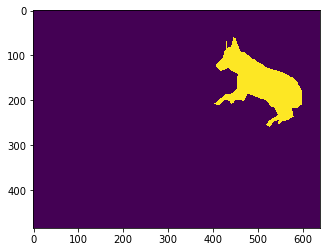

In [12]:
ix = 17
ann_id = ann_ids[ix]
ann = coco.loadAnns([ann_id])[0]
m = coco.annToMask(ann)
plt.imshow(m)
print(m.dtype, m.shape)

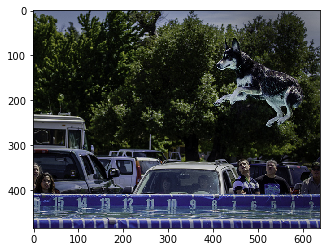

In [13]:
img = coco.loadImgs([ann['image_id']])[0]
im = imread(osp.join(IMAGE_DIR, img['file_name']))
plt.imshow(im)

## Use GrabCut to do the segmentation

(402, 58, 197, 201)


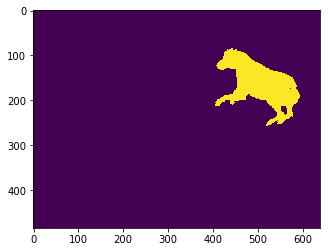

In [78]:
cv_im = cv2.imread(osp.join(IMAGE_DIR, img['file_name']))
mask = np.zeros(cv_im.shape[:2], np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (int(ann['bbox'][0]), int(ann['bbox'][1]), int(ann['bbox'][2]), int(ann['bbox'][3]))
print(rect)
cv2.grabCut(cv_im,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
grab_mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
plt.imshow(grab_mask)

## Encode and Decode RLE

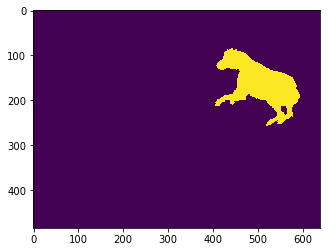

In [76]:
rle = COCOmask.encode(np.asfortranarray(grab_mask))
grab_mask2 = COCOmask.decode(rle)
plt.imshow(grab_mask2)